In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("reports/figures", exist_ok=True)

In [ ]:
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

try:
    red_wine = pd.read_csv(red_wine_url, sep=";")
    white_wine = pd.read_csv(white_wine_url, sep=";")
    print("Data downloaded and loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

In [25]:
# --- Data Combination ---
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

wine_df = pd.concat([red_wine, white_wine], ignore_index=True)
wine_df.to_csv("data/raw/wine_quality_raw.csv", index=False)

print("\nFirst 5 rows of combined dataset:")
print(wine_df.head())


First 5 rows of combined dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5

In [ ]:
print("\nDataset Information:")
wine_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
print("\nMissing values per column:")
print(wine_df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [ ]:
# --- Remove Duplicates ---
num_duplicates = wine_df.duplicated().sum()
print(f"\nFound {num_duplicates} duplicate rows.")
print(f"Original shape: {wine_df.shape}")
wine_df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {wine_df.shape}")



Found 1177 duplicate rows.
Original shape: (6497, 13)
Shape after dropping duplicates: (5320, 13)


In [12]:
# Save cleaned dataset
wine_df.to_csv("data/processed/wine_quality_cleaned.csv", index=False)
print("\nCleaned data saved to 'data/processed/wine_quality_cleaned.csv'")


Cleaned data saved to 'data/processed/wine_quality_cleaned.csv'


In [13]:
# Reload cleaned dataset
df = pd.read_csv("data/processed/wine_quality_cleaned.csv")

In [14]:
# --- Setup Plotting Style ---
sns.set_style("whitegrid")

In [15]:
# Utility function to save/show plots
def show_and_save_plot(filename=None):
    if filename:
        plt.savefig(f"reports/figures/{filename}", bbox_inches="tight")
    plt.show()

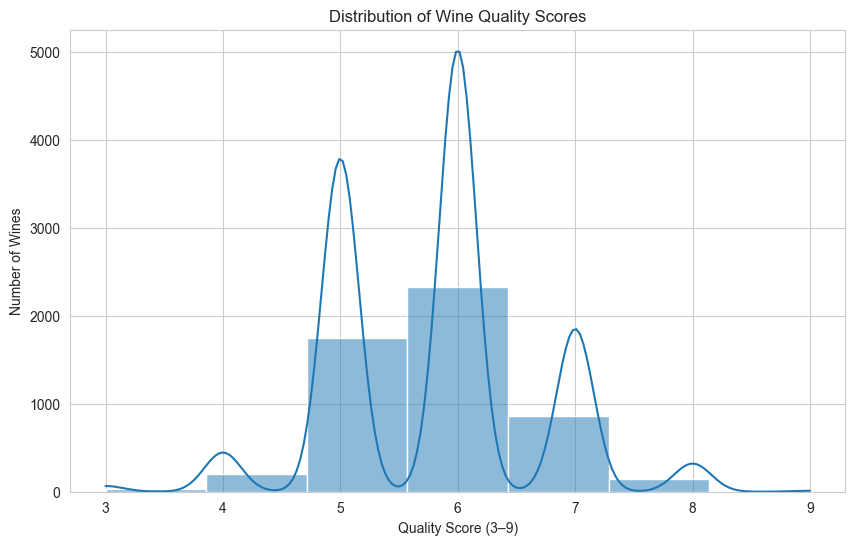

In [16]:
# --- Part A: Distribution of Target Variable ---
plt.figure(figsize=(10, 6))
sns.histplot(df["quality"], kde=True, bins=7)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score (3–9)")
plt.ylabel("Number of Wines")
show_and_save_plot("quality_distribution.png")

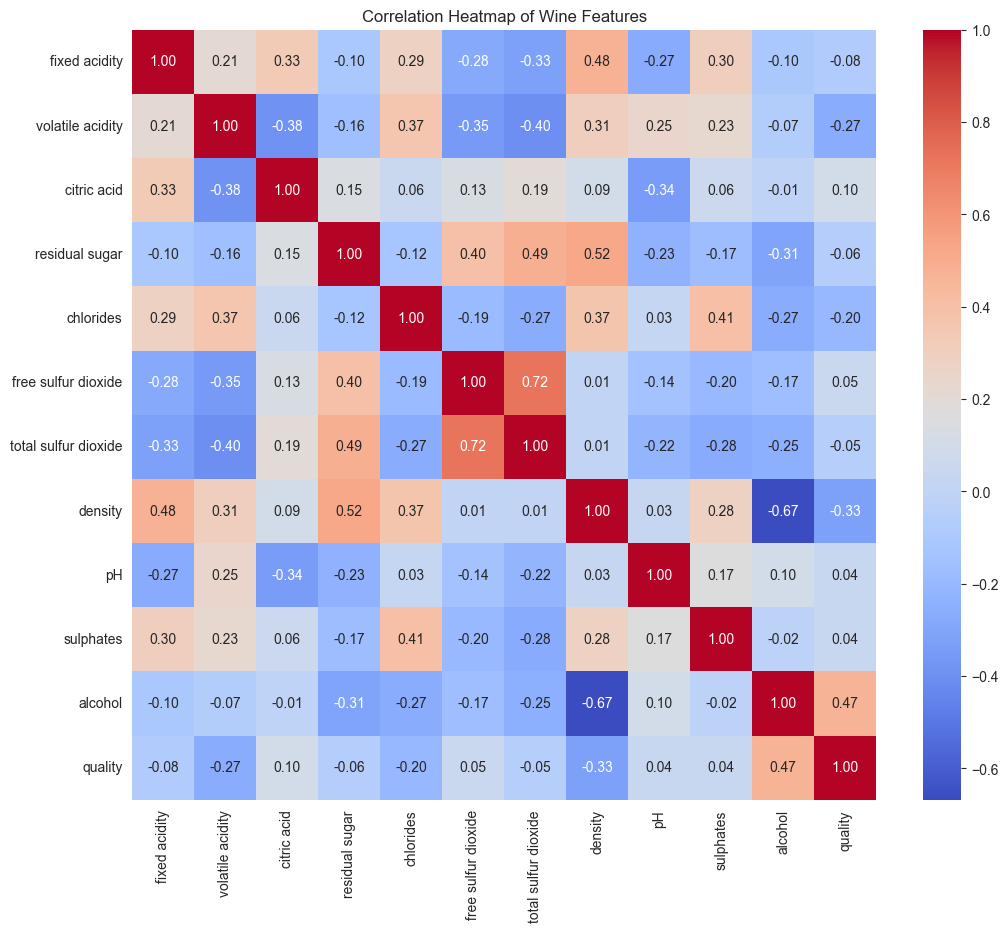

In [17]:
# --- Part B: Correlation Heatmap ---
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Wine Features")
show_and_save_plot("correlation_heatmap.png")

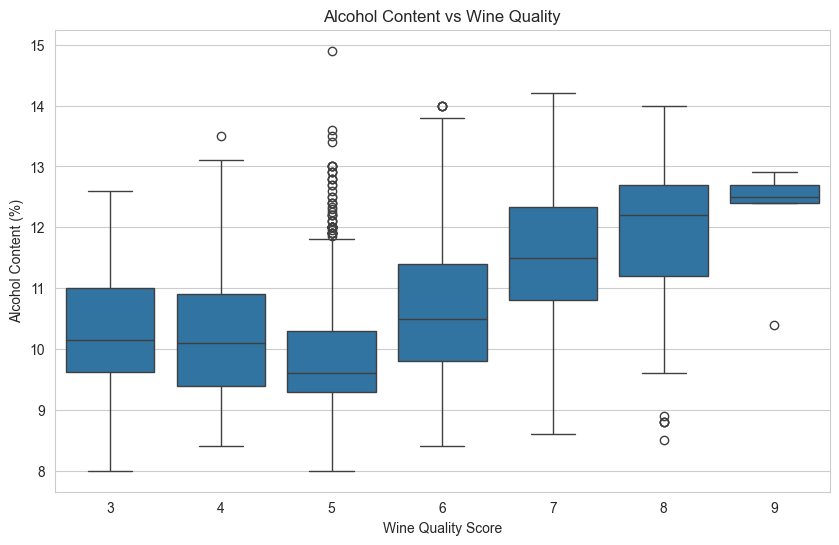

In [18]:
# --- Part C: Alcohol vs Quality (Boxplot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Wine Quality Score")
plt.ylabel("Alcohol Content (%)")
show_and_save_plot("alcohol_vs_quality.png")


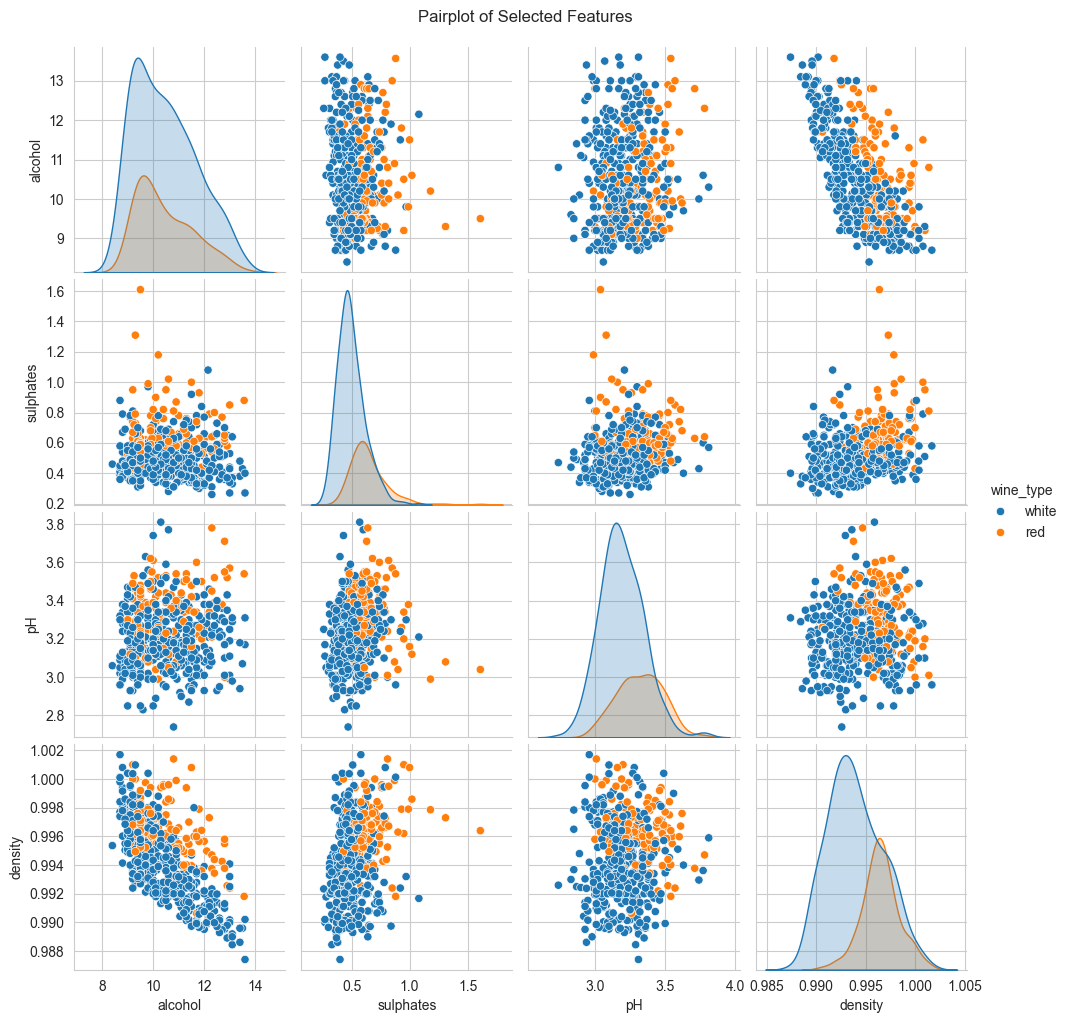

In [19]:
# 1. Pairplot (sampled for speed)
sns.pairplot(df.sample(500), vars=["alcohol", "sulphates", "pH", "density"], hue="wine_type", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
show_and_save_plot("pairplot.png")

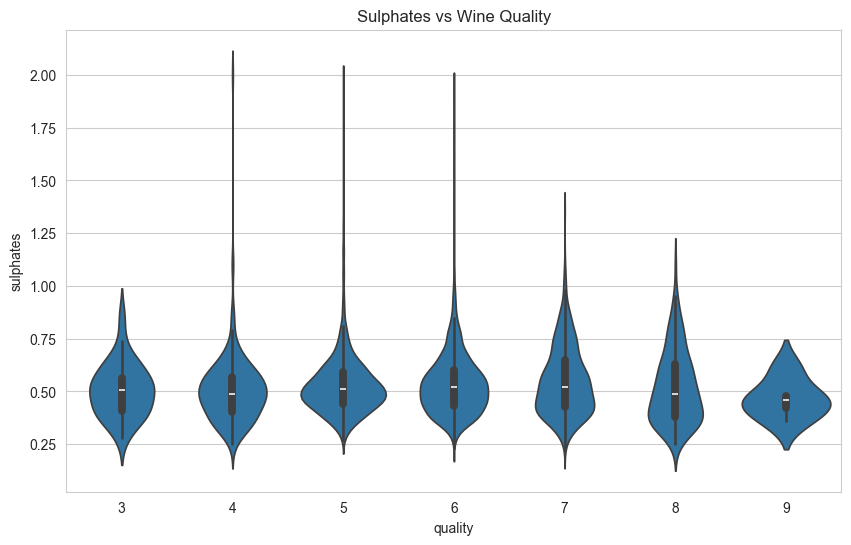

In [20]:
# 2. Violin Plot: Sulphates vs Quality
plt.figure(figsize=(10, 6))
sns.violinplot(x="quality", y="sulphates", data=df, inner="box")
plt.title("Sulphates vs Wine Quality")
show_and_save_plot("sulphates_violin.png")

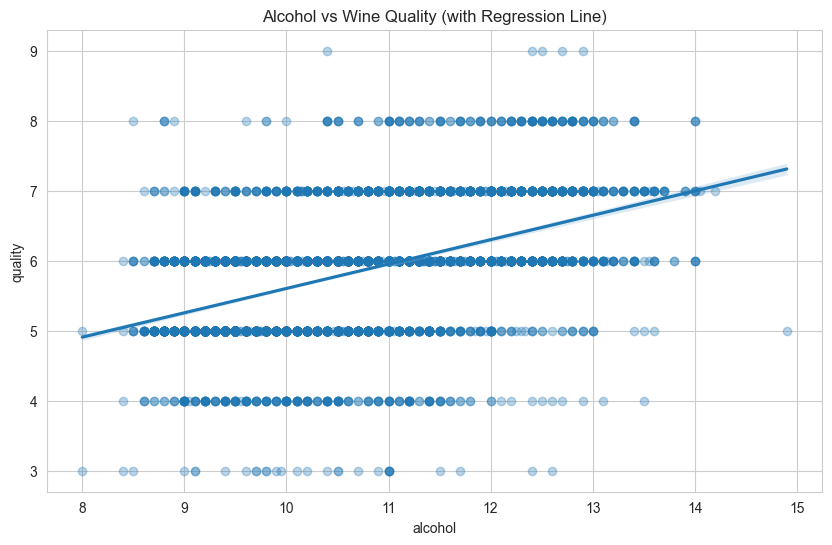

In [21]:
# 3. Scatter with Regression Line: Alcohol vs Quality
plt.figure(figsize=(10, 6))
sns.regplot(x="alcohol", y="quality", data=df, scatter_kws={"alpha":0.3})
plt.title("Alcohol vs Wine Quality (with Regression Line)")
show_and_save_plot("alcohol_regplot.png")

In [22]:
# 4. Groupby: Average quality by wine type
avg_quality = df.groupby("wine_type")["quality"].mean()
print("\nAverage quality by wine type:")
print(avg_quality)


Average quality by wine type:
wine_type
red      5.623252
white    5.854835
Name: quality, dtype: float64


C:\Users\HPi5_\AppData\Local\Temp\ipykernel_25364\1835573607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quality.index, y=avg_quality.values, palette="Set2")


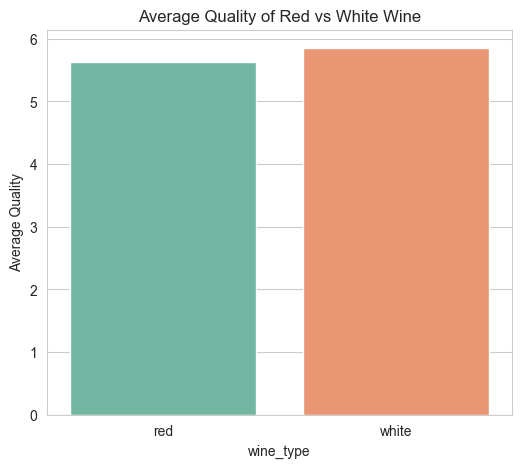

In [23]:
# Barplot
plt.figure(figsize=(6, 5))
sns.barplot(x=avg_quality.index, y=avg_quality.values, palette="Set2")
plt.title("Average Quality of Red vs White Wine")
plt.ylabel("Average Quality")
show_and_save_plot("avg_quality_wine_type.png")

In [24]:
print("\nEDA Completed. Figures saved in 'reports/figures/'")


EDA Completed. Figures saved in 'reports/figures/'
